## Importar Librerías Necesarias

```markdown
Se importan las librerías y funciones necesarias para la implementación de las distintas tareas a realizar durante el proyecto de análisis
```

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr



In [39]:
project_dataframe = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print(project_dataframe.head())
print(project_dataframe.info())
print(project_dataframe.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [40]:
numeric_variables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

project_dataframe[numeric_variables] = project_dataframe[numeric_variables].fillna(project_dataframe[numeric_variables].median())

nominal_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

project_dataframe[nominal_variables] = project_dataframe[nominal_variables].fillna(project_dataframe[nominal_variables].mode().iloc[0])

In [41]:
label_encoders = {}

# nominal_variables.append('NObeyesdad')

for columns in nominal_variables:
   label_encoder = LabelEncoder()
   project_dataframe[columns] = label_encoder.fit_transform(project_dataframe[columns])  # Transformar la columna en numérica
   label_encoders[columns] = label_encoder

print(project_dataframe.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3        Normal_Weight  
1  3.0     2      1   3.0    1  3.0  0.0     2       3        Normal_Weight  
2  3.0     2      0   2.0    0  2.0  1.0     1       3        Normal_Weight  
3  3.0     2      0   2.0    0  2.0  0.0     1       4   Overweight_Level_I  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  Overweight_Level_II  


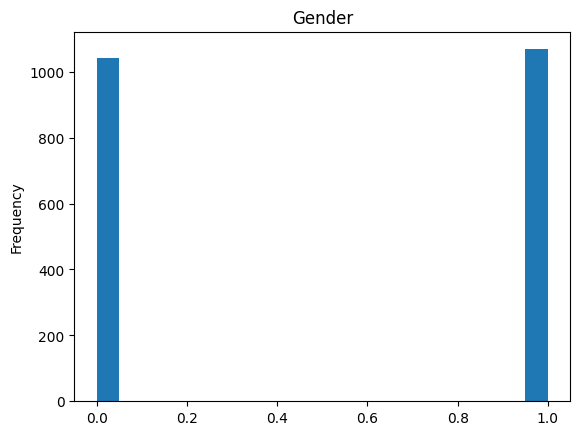

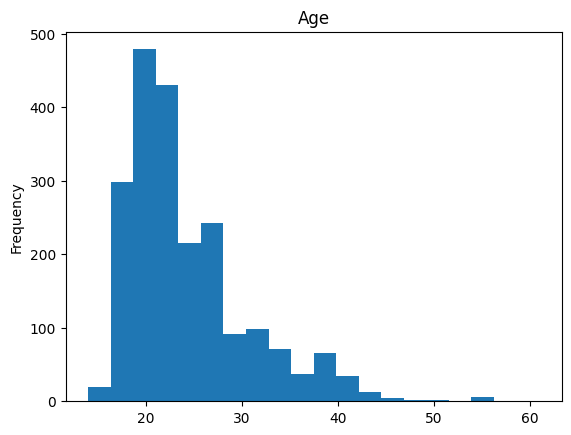

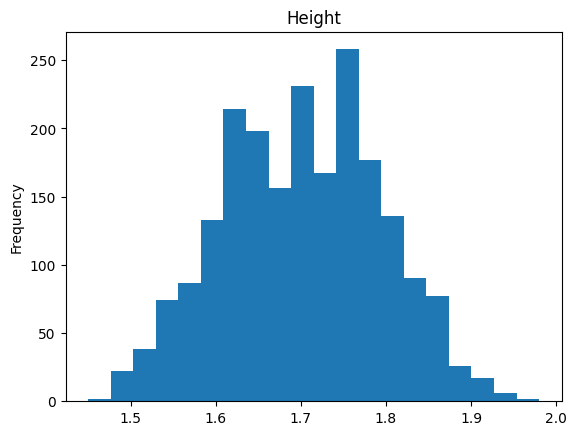

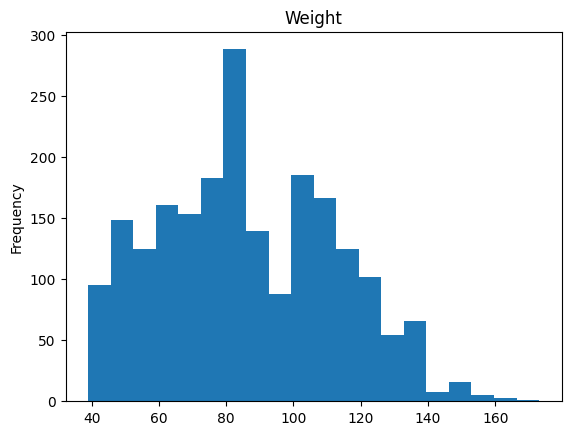

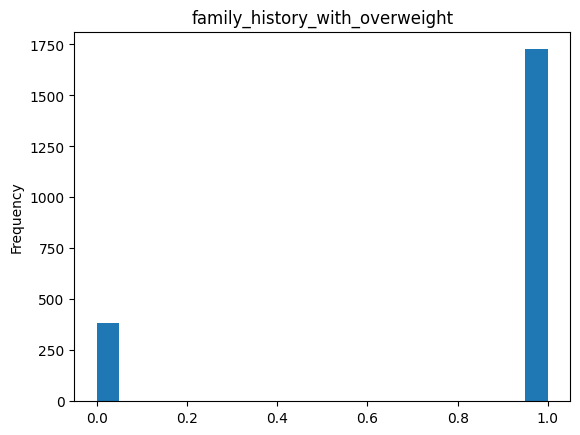

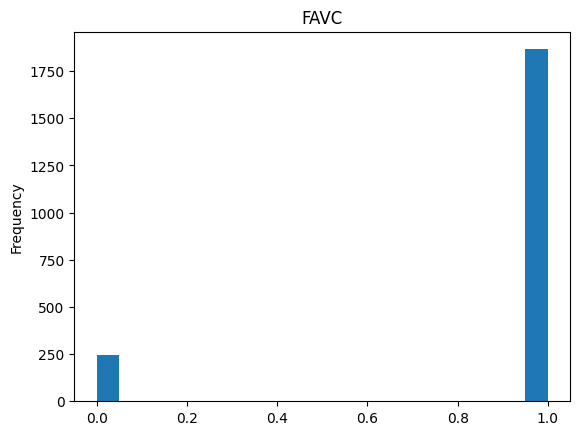

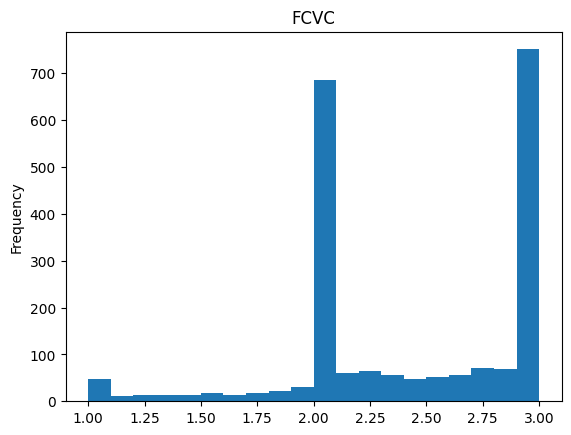

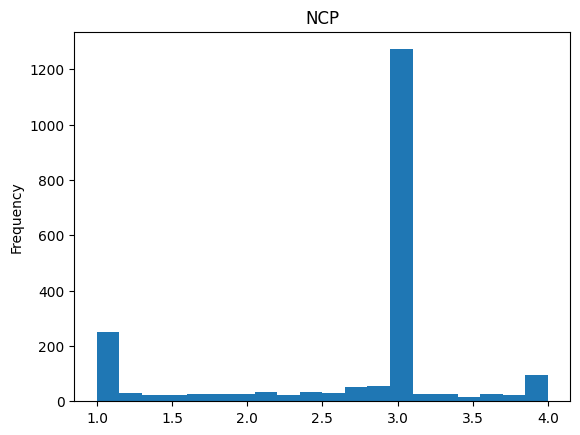

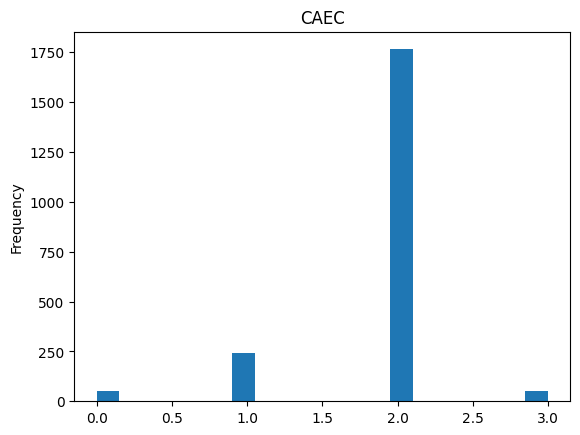

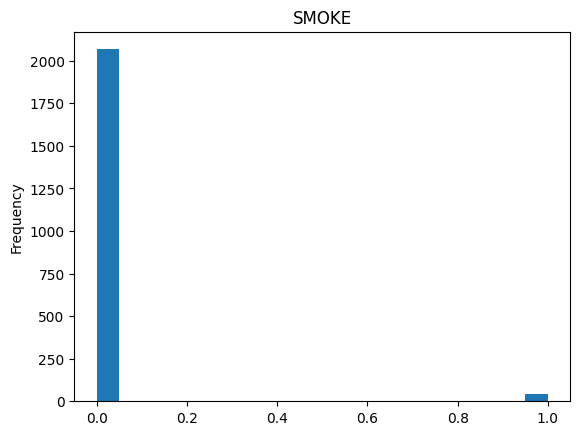

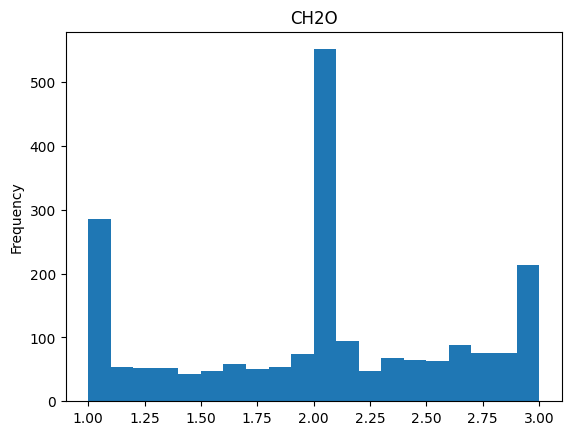

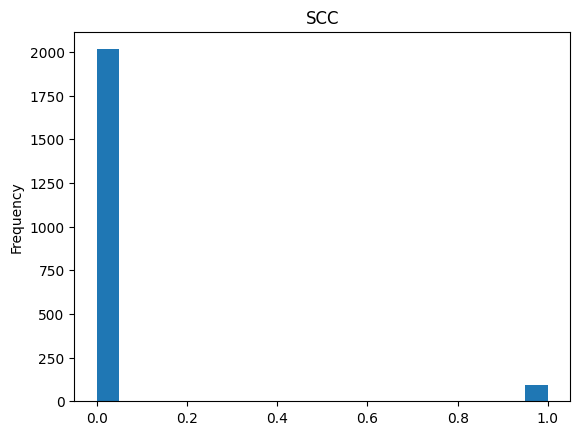

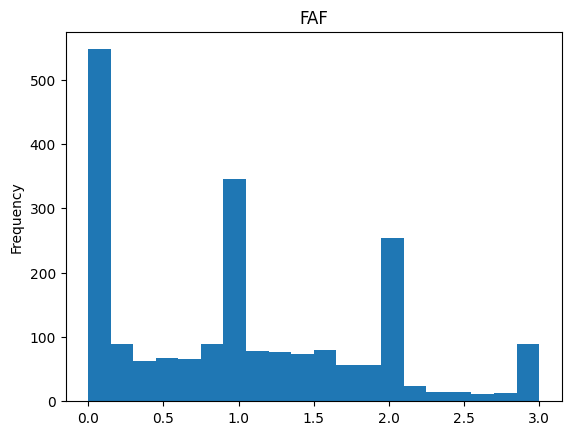

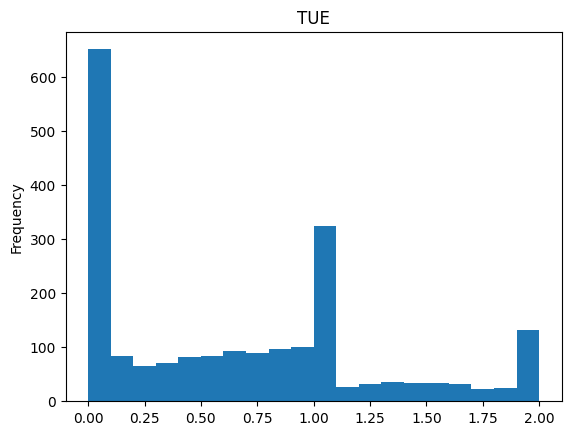

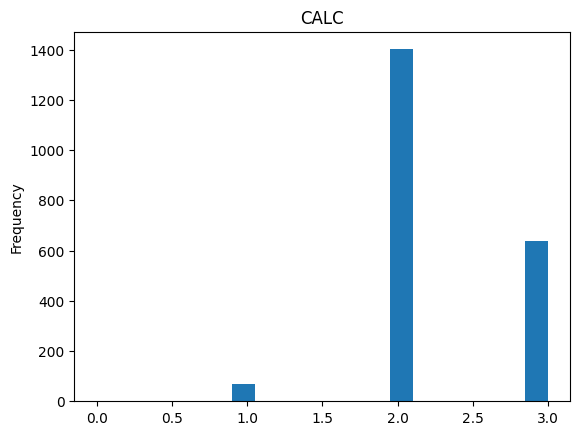

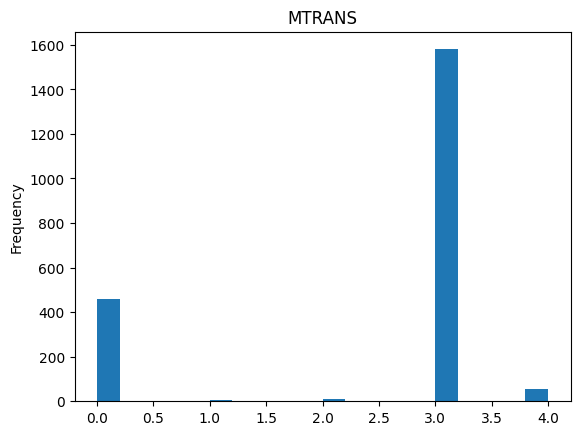

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

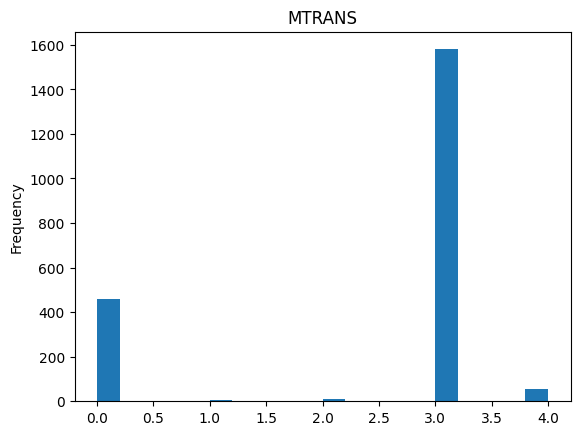

In [42]:
for column in project_dataframe.select_dtypes(include=['number']):
    plt.figure()
    project_dataframe[column].plot(kind='hist', bins=20, title=column)
    plt.show()

print(project_dataframe.info())
print('\n')
print(project_dataframe.describe())

plt.figure()
project_dataframe[column].plot(kind='hist', bins=20, title=column)
plt.show()


Quitar outliners. Al comprobar los outliners encontramos que no hay nada importante que objetar, por lo que lo dejamos tal cual.

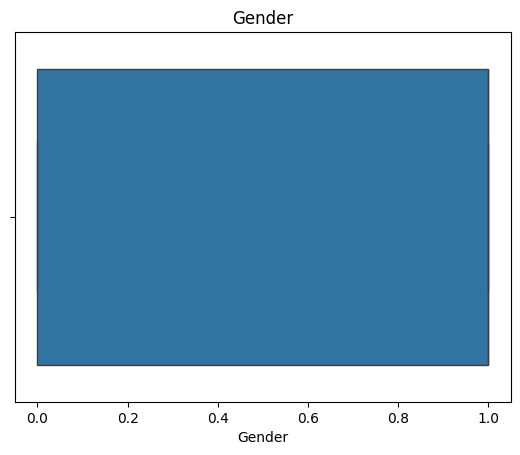

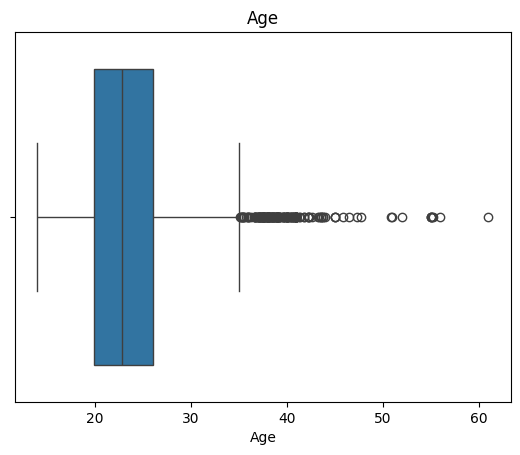

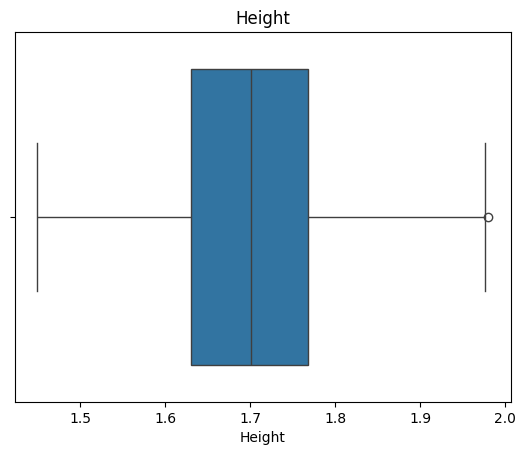

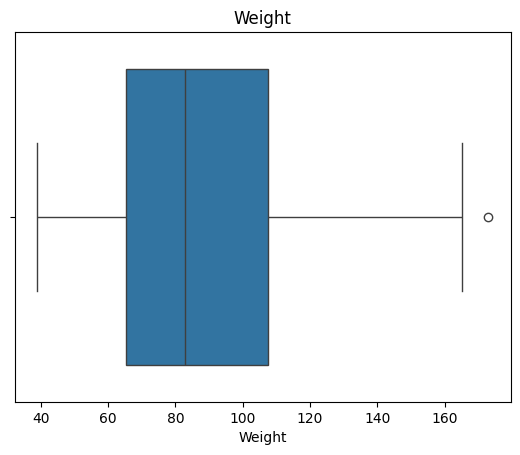

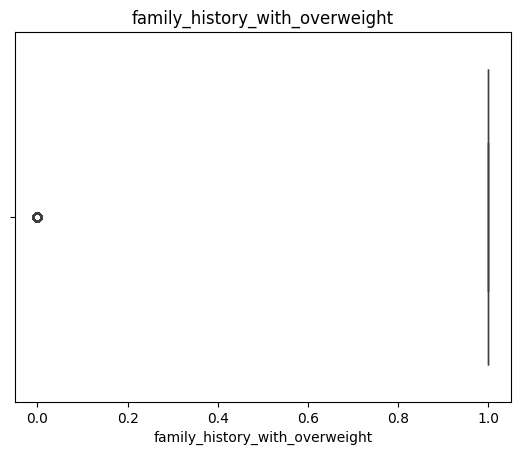

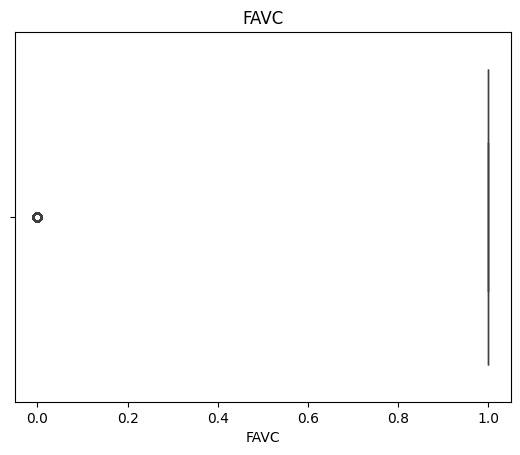

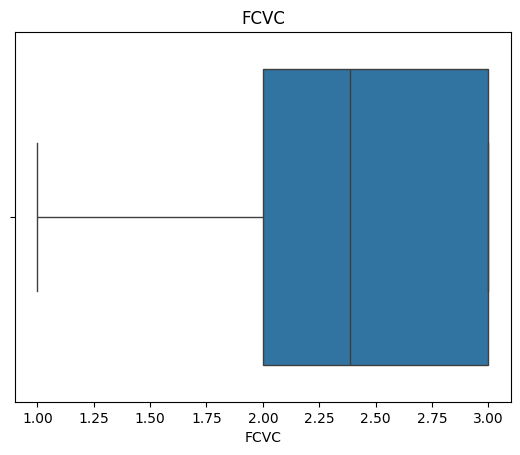

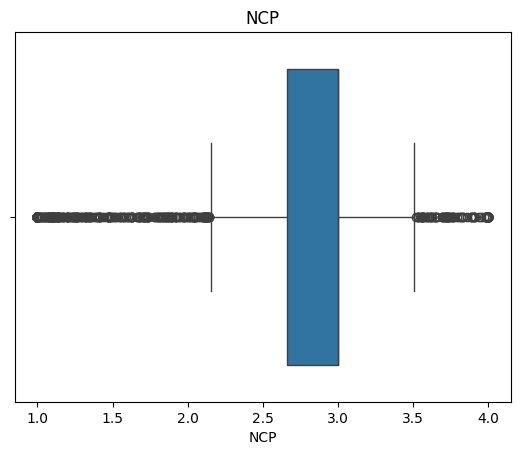

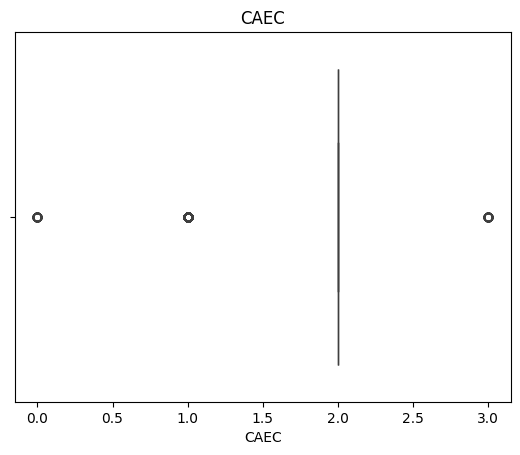

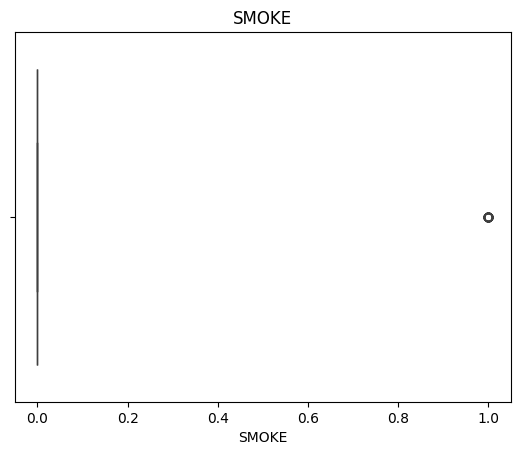

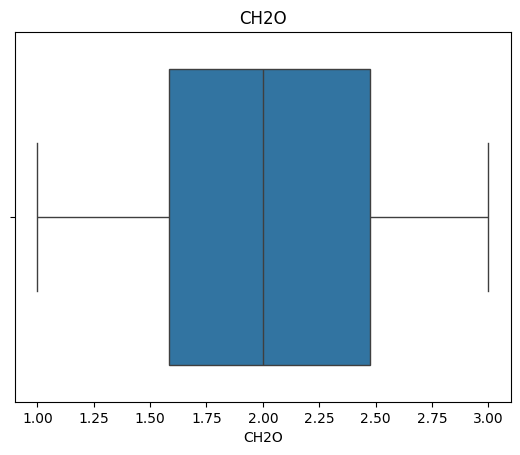

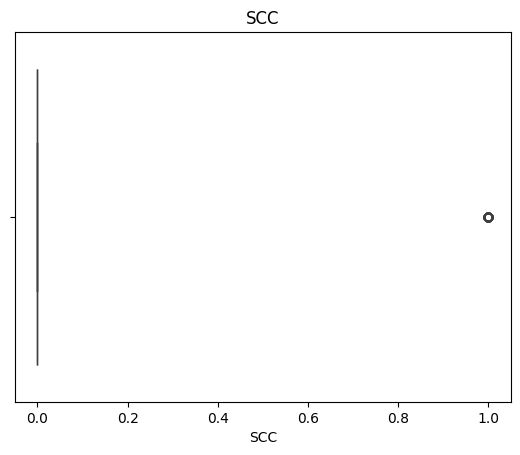

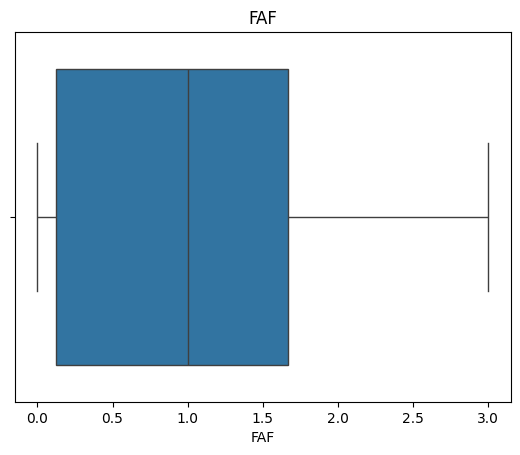

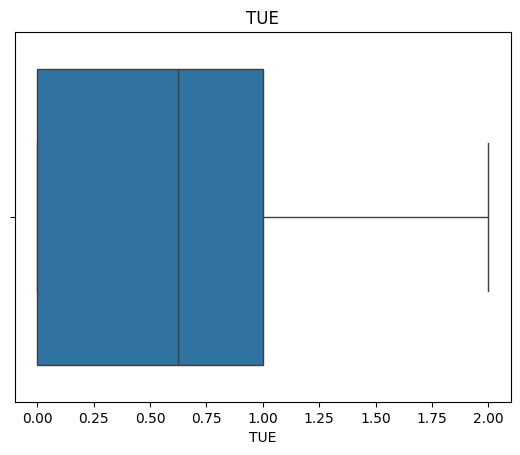

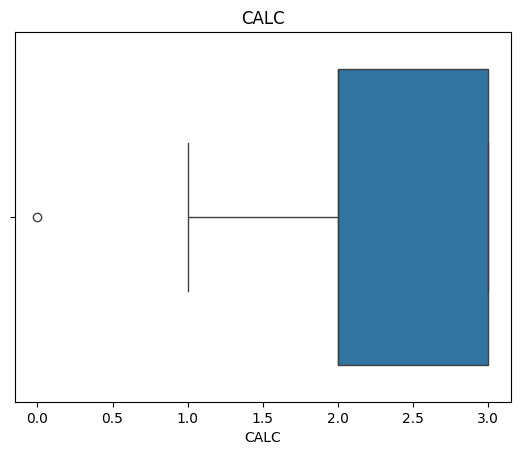

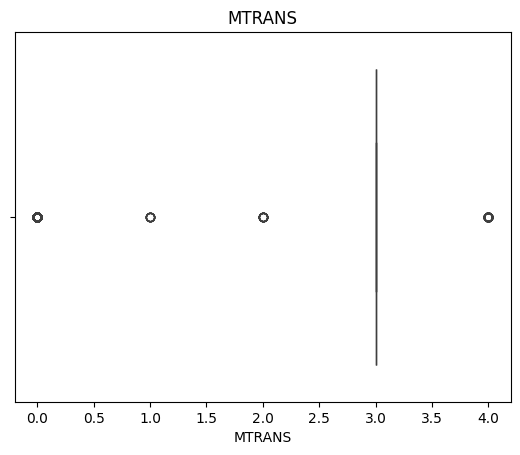

In [43]:
for column in project_dataframe.select_dtypes(include=[np.number]):
    plt.figure()
    sns.boxplot(x=project_dataframe[column])
    plt.title(column)
    plt.show()

## Gestion de los valores nulos

```markdown
Si tras el proceso de transformación de los datos, balanceo y tratamiento de outliers, se encuentra algún valor nulo, al ya ser todas las variables de tipo numérico, rellenamos los valores restantes según la mediana.
```

In [44]:
print(project_dataframe.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


```markdown
Observamos que no existen valores nulos por lo que no es necesario el tratamiento de estos.
```

## Gestionamos la división de las clases en predictoras y objetivo

In [45]:
predict_variables = project_dataframe.drop('NObeyesdad', axis=1)
target_variable = project_dataframe['NObeyesdad']

# División en conjunto de entrenamiento(70%) y prueba(30%)
predict_variables_train, predict_variables_test, target_variable_train, target_variable_test = train_test_split(predict_variables, target_variable, test_size=0.3, random_state=42)

## Gestionamos el desbalanceo de las clases

In [46]:
# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases antes de SMOTE:")
print(target_variable_train.value_counts())

smote = SMOTE()
predict_variables_train, target_variable_train = smote.fit_resample(predict_variables_train, target_variable_train)

# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases después de SMOTE:")
print(target_variable_train.value_counts())

Distribución de clases antes de SMOTE:
NObeyesdad
Obesity_Type_I         249
Obesity_Type_III       226
Overweight_Level_II    211
Obesity_Type_II        209
Overweight_Level_I     202
Normal_Weight          194
Insufficient_Weight    186
Name: count, dtype: int64
Distribución de clases después de SMOTE:
NObeyesdad
Obesity_Type_III       249
Overweight_Level_II    249
Normal_Weight          249
Overweight_Level_I     249
Obesity_Type_II        249
Insufficient_Weight    249
Obesity_Type_I         249
Name: count, dtype: int64


In [47]:
models = {
  "KNN": KNeighborsClassifier(n_neighbors=20),
  "Naive Bayes": GaussianNB(),
  "Árbol de Decisión": DecisionTreeClassifier(criterion='entropy', max_depth=12)
}


Modelo: KNN
[[81  5  0  0  0  0  0]
 [22 45  2  0  0 16  8]
 [ 0  0 74  8  5  7  8]
 [ 0  0  3 80  5  0  0]
 [ 0  0  0  3 95  0  0]
 [ 1 14  0  0  0 65  8]
 [ 0  5 10  2  0 18 44]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.94      0.85        86
      Normal_Weight       0.65      0.48      0.56        93
     Obesity_Type_I       0.83      0.73      0.77       102
    Obesity_Type_II       0.86      0.91      0.88        88
   Obesity_Type_III       0.90      0.97      0.94        98
 Overweight_Level_I       0.61      0.74      0.67        88
Overweight_Level_II       0.65      0.56      0.60        79

           accuracy                           0.76       634
          macro avg       0.76      0.76      0.75       634
       weighted avg       0.76      0.76      0.76       634

Accuracy: 0.76


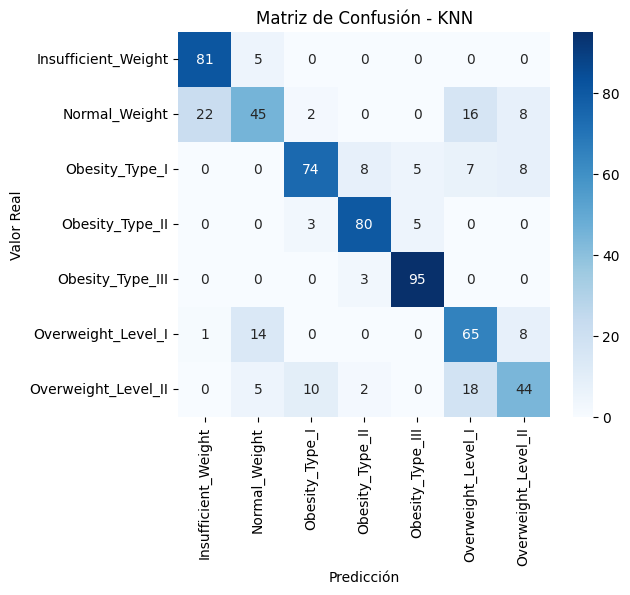


Modelo: Naive Bayes
[[70  3  9  0  0  4  0]
 [32 32  7  0  0 15  7]
 [ 0  2 64 27  0  5  4]
 [ 0  0  7 80  0  1  0]
 [ 0  0  1  0 97  0  0]
 [ 4 11 42  1  0 26  4]
 [ 0  9 42  6  0  4 18]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.66      0.81      0.73        86
      Normal_Weight       0.56      0.34      0.43        93
     Obesity_Type_I       0.37      0.63      0.47       102
    Obesity_Type_II       0.70      0.91      0.79        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.47      0.30      0.36        88
Overweight_Level_II       0.55      0.23      0.32        79

           accuracy                           0.61       634
          macro avg       0.62      0.60      0.59       634
       weighted avg       0.62      0.61      0.59       634

Accuracy: 0.61


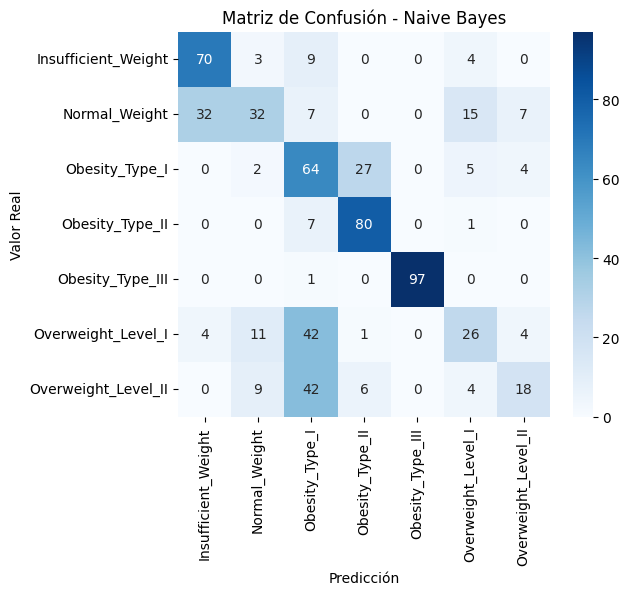


Modelo: Árbol de Decisión
[[81  5  0  0  0  0  0]
 [ 6 77  0  0  0 10  0]
 [ 0  1 95  5  0  0  1]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  7  0  0  0 79  2]
 [ 0  0  0  0  0  2 77]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94        86
      Normal_Weight       0.86      0.83      0.84        93
     Obesity_Type_I       1.00      0.93      0.96       102
    Obesity_Type_II       0.94      1.00      0.97        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.87      0.90      0.88        88
Overweight_Level_II       0.96      0.97      0.97        79

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634

Accuracy: 0.94


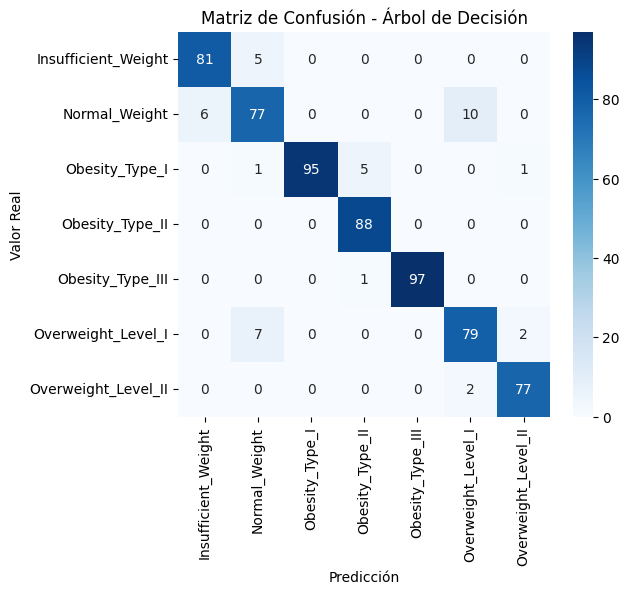

Depth 1 - Accuracy: 0.29


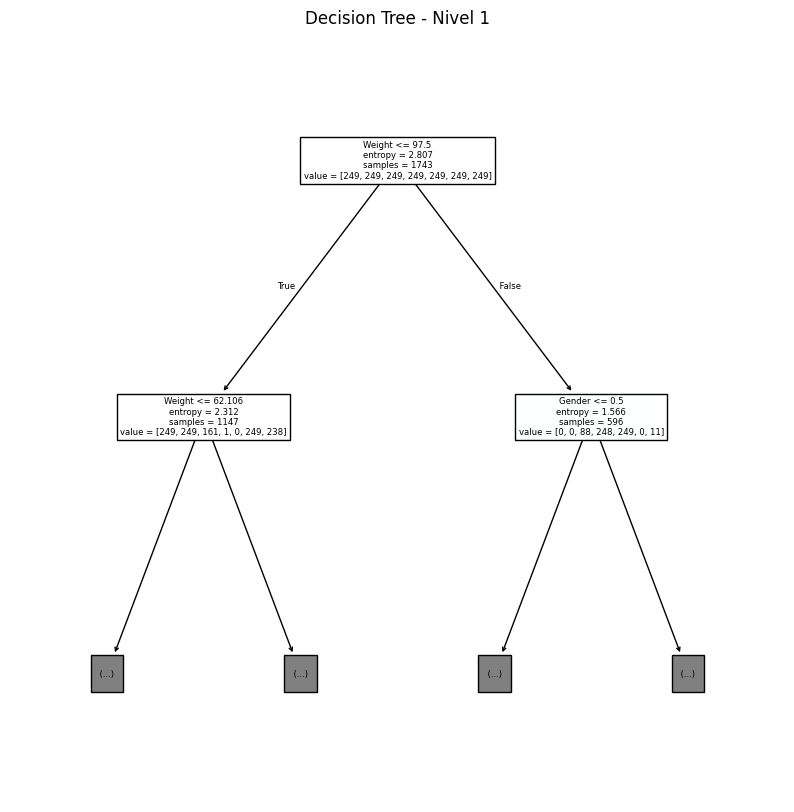

Depth 2 - Accuracy: 0.55


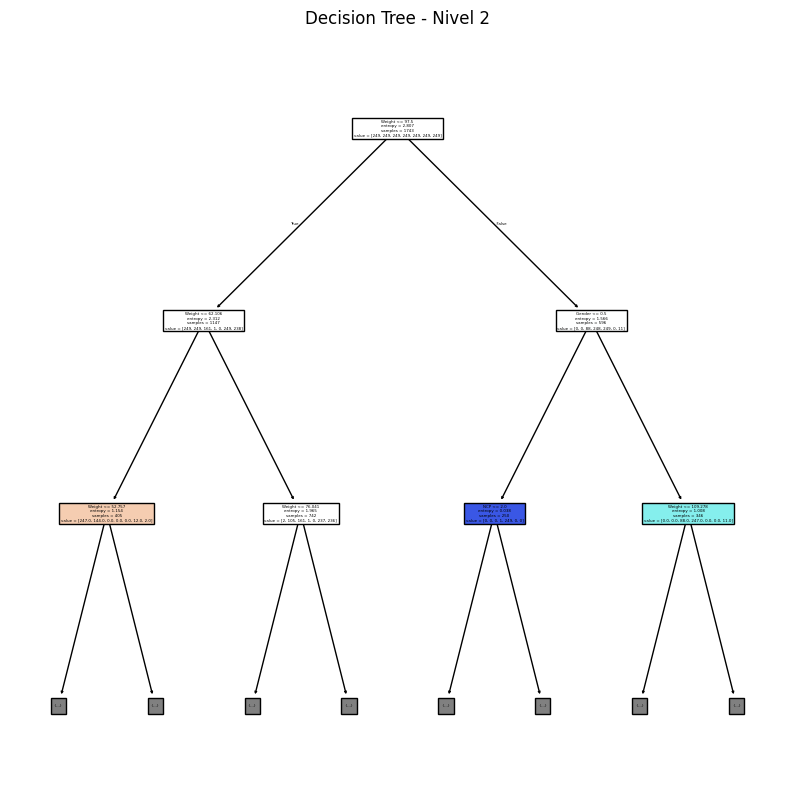

Depth 3 - Accuracy: 0.64


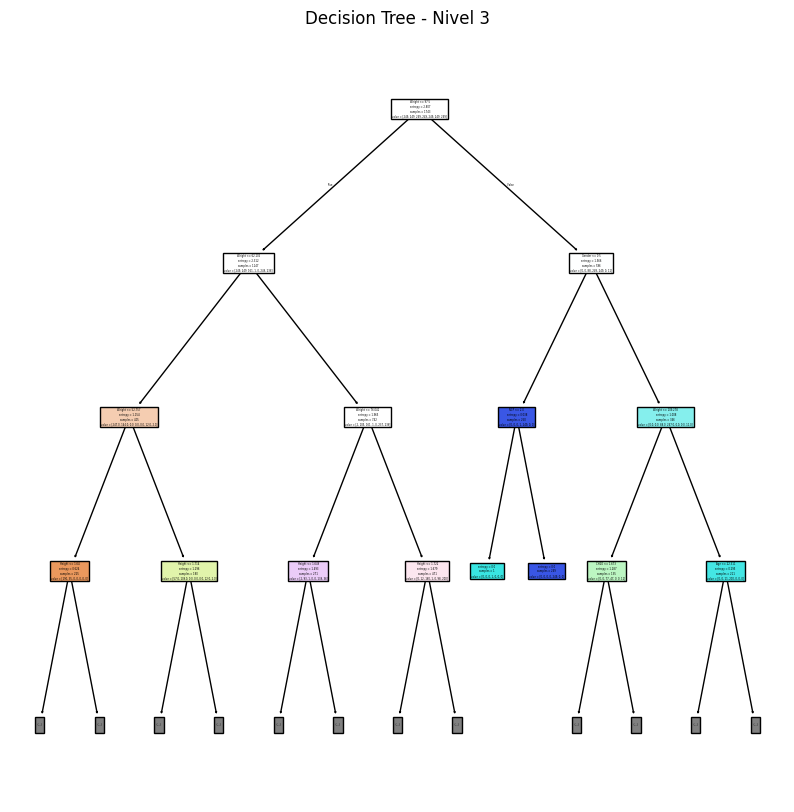

Depth 4 - Accuracy: 0.74


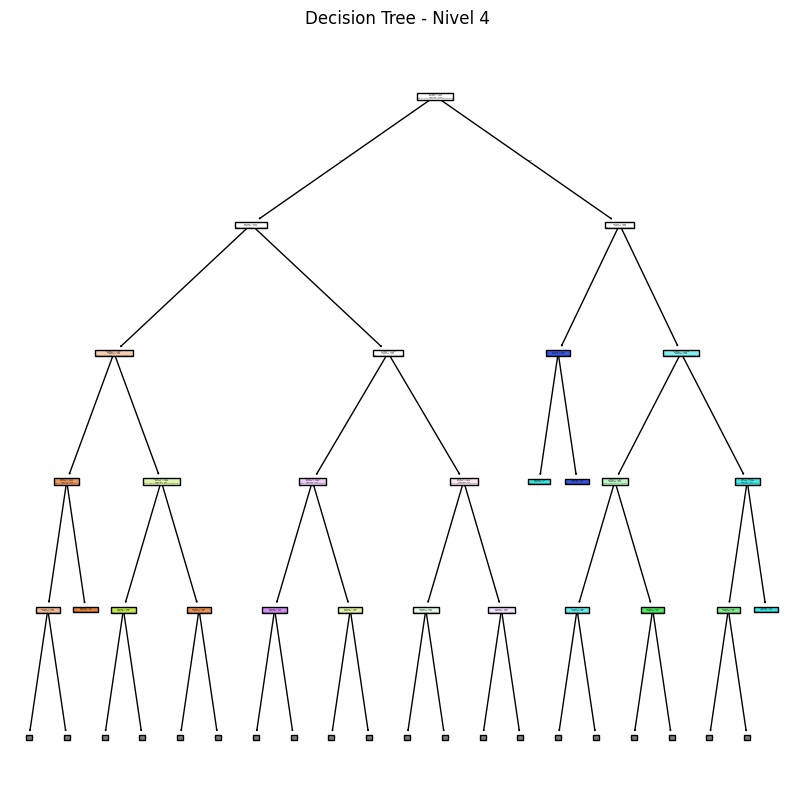

Depth 5 - Accuracy: 0.83


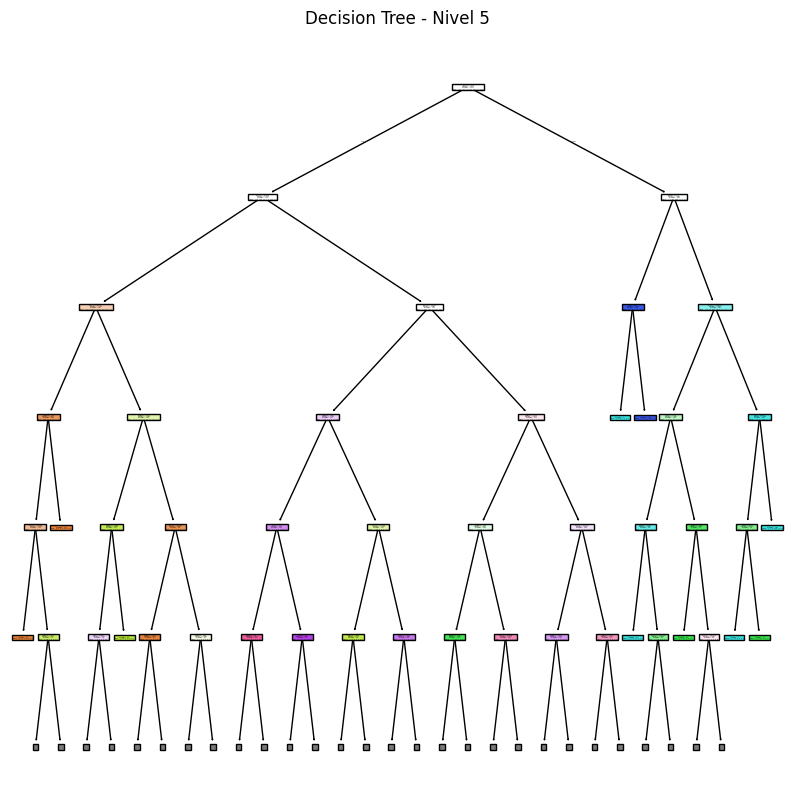

Depth 6 - Accuracy: 0.89


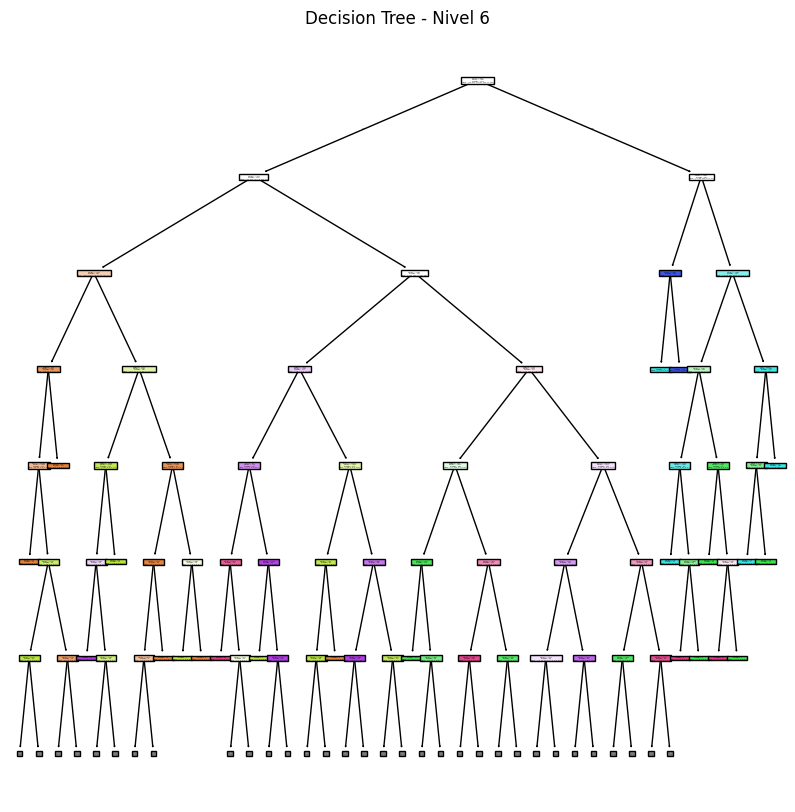

Depth 7 - Accuracy: 0.93


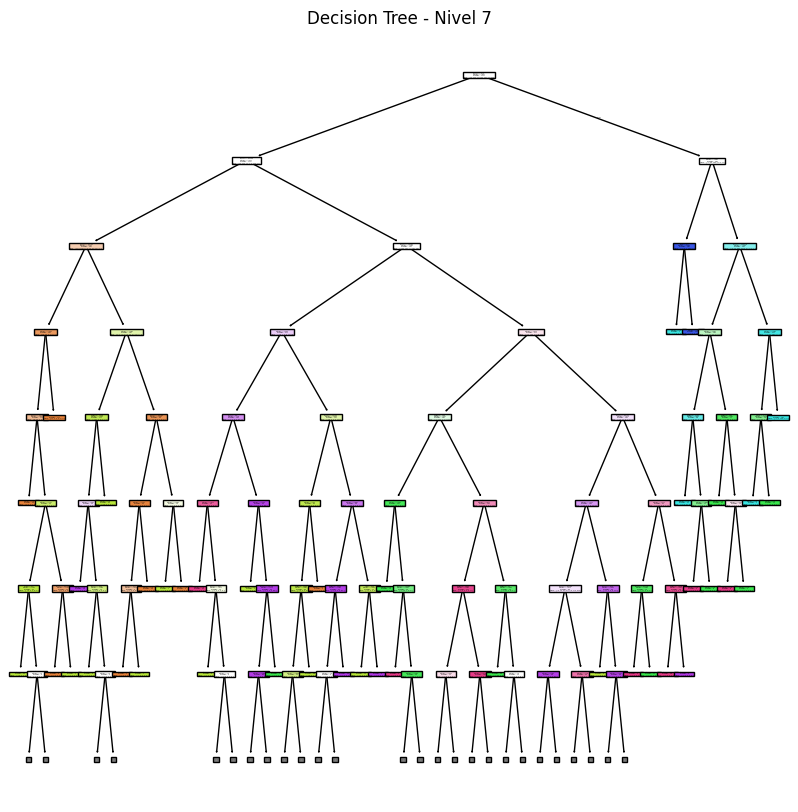

Depth 8 - Accuracy: 0.93


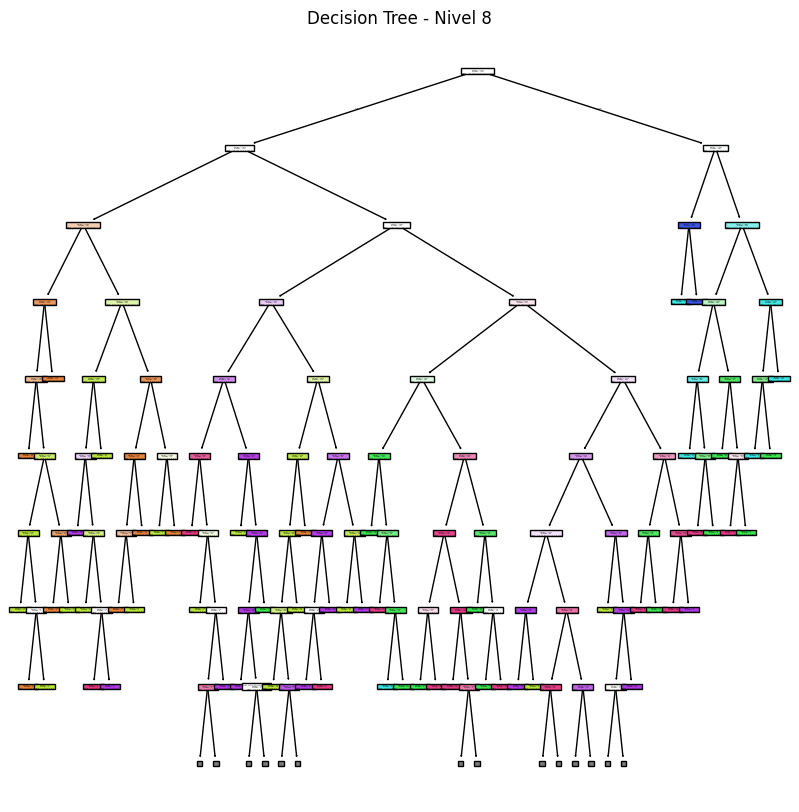

Depth 9 - Accuracy: 0.94


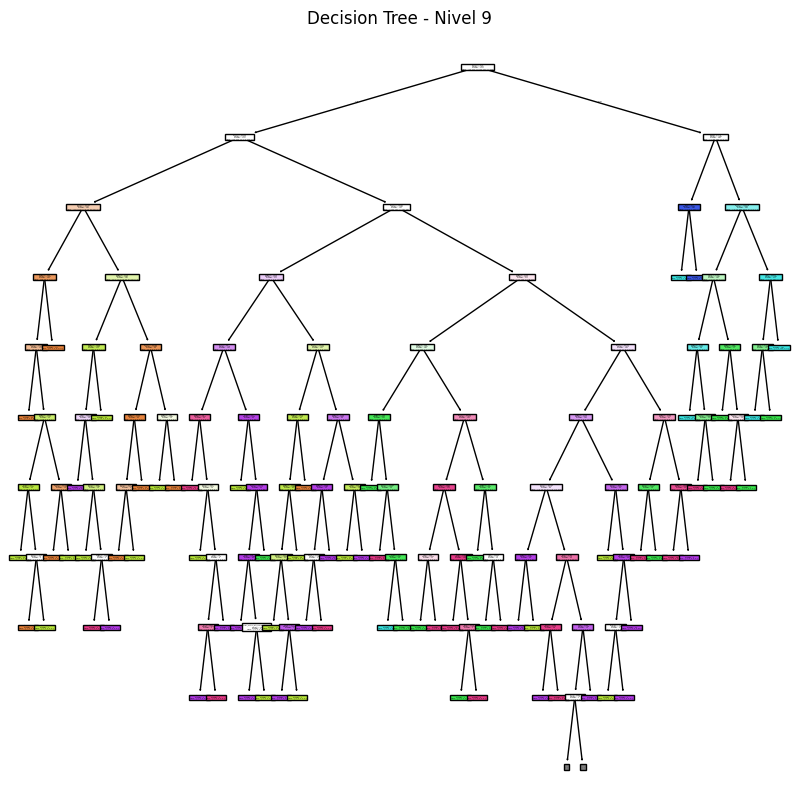

Depth 10 - Accuracy: 0.94


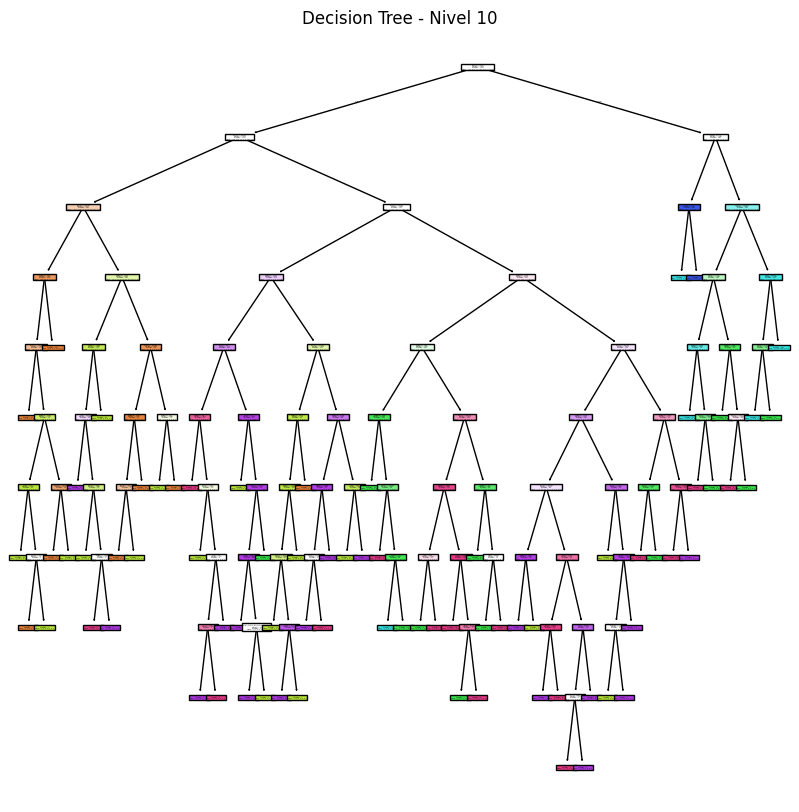

In [48]:
for name, model in models.items():
  model.fit(predict_variables_train, target_variable_train)  # Entrenar el modelo con el conjunto de entrenamiento
  target_variable_pred = model.predict(predict_variables_test)  # Hacer predicciones sobre el conjunto de prueba
  
  confusion_matrix_ = confusion_matrix(target_variable_test, target_variable_pred)
  
  print(f"\nModelo: {name}")
  print(confusion_matrix_)  # Matriz de confusión
  print(classification_report(target_variable_test, target_variable_pred))  # Reporte de clasificación
  print(f"Accuracy: {accuracy_score(target_variable_test, target_variable_pred):.2f}")  # Precisión
  
  # Graficar la matriz de confusión
  
  plt.figure(figsize=(6, 5))
  sns.heatmap(confusion_matrix_, annot=True, fmt="d", cmap="Blues", xticklabels=["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"], yticklabels=["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
  plt.title(f'Matriz de Confusión - {name}')
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()

  if (name == "Árbol de Decisión"):
    depth = model.tree_.max_depth

    for i in range(1, depth + 1):
      temp_model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
      temp_model.fit(predict_variables_train, target_variable_train)
      target_variable_pred = temp_model.predict(predict_variables_test)

      # Calculate accuracy
      acc = accuracy_score(target_variable_test, target_variable_pred)
      print(f"Depth {i} - Accuracy: {acc:.2f}")

      plt.figure(figsize=(10, 10))
      tree.plot_tree(model, filled=True, feature_names=predict_variables.columns, max_depth=i)
      plt.title(f"Decision Tree - Nivel {i}")
      plt.show()  # Show each tree without clearing previous ones

Mean Squared Error: 556.23
R^2 Score: 0.22


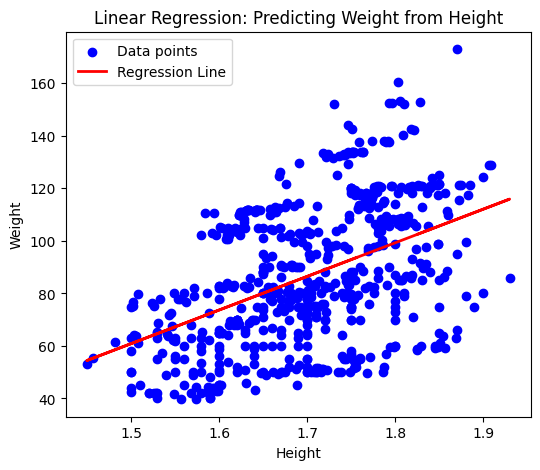

In [49]:
# Define the x and y variables
height = project_dataframe['Height']  # x variable (Height)
weight = project_dataframe['Weight']  # y variable (Weight)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(height.values.reshape(-1, 1), weight, test_size=0.3, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)  # Train the model with the training set

# Make predictions on the test set
target_variable_pred = model.predict(x_test)  # Predicted weight values for the test set

# Evaluate the model performance
mse = mean_squared_error(y_test, target_variable_pred)
r2 = r2_score(y_test, target_variable_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting the data points and the regression line
plt.figure(figsize=(6, 5))
plt.scatter(x_test, y_test, color='blue', label='Data points')  # Scatter plot of actual data
plt.plot(x_test, target_variable_pred, color='red', linewidth=2, label='Regression Line')  # Line for predicted values

# Adding title and labels
plt.title('Linear Regression: Predicting Weight from Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

# Show the plot
plt.show()

Model Evaluation:
Mean Squared Error (MSE): 30.36
Mean Absolute Error (MAE): 4.21
R² Score: 0.05
Coefficient of Correlation between Height and Age: -0.03
Coefficient of Correlation between Weight and Age: 0.20
Regression Coefficients: Height = -10.57, Weight = 0.07
Intercept: 36.60


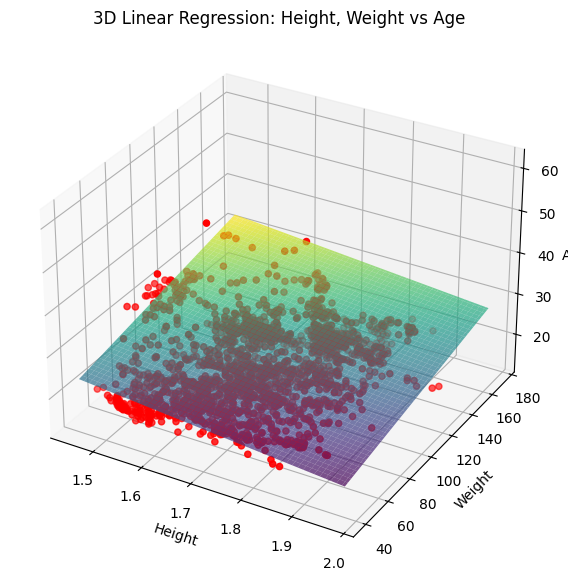

In [ ]:
# BUSCAR SI CON UN MODELO POLINOMICO EL MODELO MEJORA EL COEFICIENTE DE CORRELACION

# Define predictor variables (X) and target variable (y)
height_weight = project_dataframe[['Height', 'Weight']]  # Features (X)
age = project_dataframe['Age']  # Target (y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(height_weight, age, test_size=0.3, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the coefficients (for understanding the relation between Height, Weight, and Age)
coef_height = model.coef_[0]
coef_weight = model.coef_[1]
intercept = model.intercept_

# Calculate Pearson Correlation Coefficients
corr_height, _ = pearsonr(height_weight['Height'], age)
corr_weight, _ = pearsonr(height_weight['Weight'], age)

# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics and correlation coefficients
print(f"Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Coefficient of Correlation between Height and Age: {corr_height:.2f}")
print(f"Coefficient of Correlation between Weight and Age: {corr_weight:.2f}")
print(f"Regression Coefficients: Height = {coef_height:.2f}, Weight = {coef_weight:.2f}")
print(f"Intercept: {intercept:.2f}")

# Create a meshgrid to plot the surface
x_range = np.linspace(min(height_weight['Height']), max(height_weight['Height']), 100)
y_range = np.linspace(min(height_weight['Weight']), max(height_weight['Weight']), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Predict the Age for each combination of Height and Weight in the meshgrid
z_mesh = coef_height * x_mesh + coef_weight * y_mesh + intercept

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface (predicted Age)
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', alpha=0.7)

# Plot the original data points on top of the surface
ax.scatter(height_weight['Height'], height_weight['Weight'], age, color='red', label='Data points')

# Labels and title
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Age')
ax.set_title('3D Linear Regression: Height, Weight vs Age')

# Show the plot
plt.show()

In [51]:
# # En el modelo de regresion para nuestra base de datos no seria efectivo ya que el modelo de regresion unicamente funciona sobre datos numericos y no sirve pasarlo a numerico ya que si tenemos 0,1 y 2 como categorias que sustituyen a las cadenas, los resultados podrían dar
# # resultados erroneos como 1,5 que no correspondería a ninguna categoria en nuestro modelo por eso no es efectivo.
# # Para usar este modelo lo que podemos hacer es usar el modelo solo para predecir usando 2 variable numericas que contenga nuestra base d datos, por ejemplo, sabiendo la edad y el peso podemos predecir la altura?

# # Transformar las características a un espacio polinómico
# poly = PolynomialFeatures(degree=7)  # Puedes ajustar el grado del polinomio según sea necesario
# predict_variables_train_poly = poly.fit_transform(predict_variables_train)
# predict_variables_test_poly = poly.transform(predict_variables_test)

# # Crear y entrenar el modelo de regresión polinómica
# model = LinearRegression()
# model.fit(predict_variables_train_poly, target_variable_train_numeric)  # Entrenar el modelo con el conjunto de entrenamiento
# target_variable_pred = model.predict(predict_variables_test_poly)  # Hacer predicciones sobre el conjunto de prueba

# # Calcular métricas de evaluación
# mse = mean_squared_error(target_variable_test_numeric, target_variable_pred)
# r2 = r2_score(target_variable_test_numeric, target_variable_pred)

# # Imprimir métricas de evaluación
# print(f"\nModelo: Regresión Polinómica")
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R^2 Score: {r2:.2f}")

# # Graficar las predicciones frente a los valores reales
# plt.figure(figsize=(6, 5))
# plt.scatter(target_variable_test_numeric, target_variable_pred, color='blue')
# plt.plot(target_variable_test_numeric, target_variable_test_numeric, color='red', linewidth=2)
# plt.title('Regresión Polinómica - Predicciones vs Valores Reales')
# plt.xlabel('Valor Real')
# plt.ylabel('Predicción')
# plt.show()